In [479]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
%matplotlib inline

In [480]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
full_data = pd.concat([train_data, test_data], ignore_index=True)
sample_data = pd.read_csv("sample_submission.csv")

In [481]:
# statistical data
print("train data shpae is (%i, %i)"% train_data.shape)
print("test data shape is (%i, %i)"% test_data.shape)
print("full data shape is (%i, %i)"% full_data.shape)
print(train_data.dtypes)

train data shpae is (1460, 81)
test data shape is (1459, 80)
full data shape is (2919, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplace

In [482]:
display(train_data.describe())
display(train_data.head())
display(test_data.head())
display(sample_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [483]:
# LabelEncoding
for i in range(train_data.shape[1]):
    if train_data.iloc[:, i].dtypes==object:
        lbl = LabelEncoder()
        lbl.fit(list(train_data.iloc[:, i].values) + list(test_data.iloc[:, i].values))
        train_data.iloc[:, i] = lbl.transform(list(train_data.iloc[:, i].values))
        test_data.iloc[:, i] = lbl.transform(list(test_data.iloc[:, i].values))

In [485]:
# Check LabelEncoding
print(train_data.dtypes)
print("______________________________________")
print(test_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
FireplaceQu        int64
GarageType         int64
GarageYrBlt      float64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


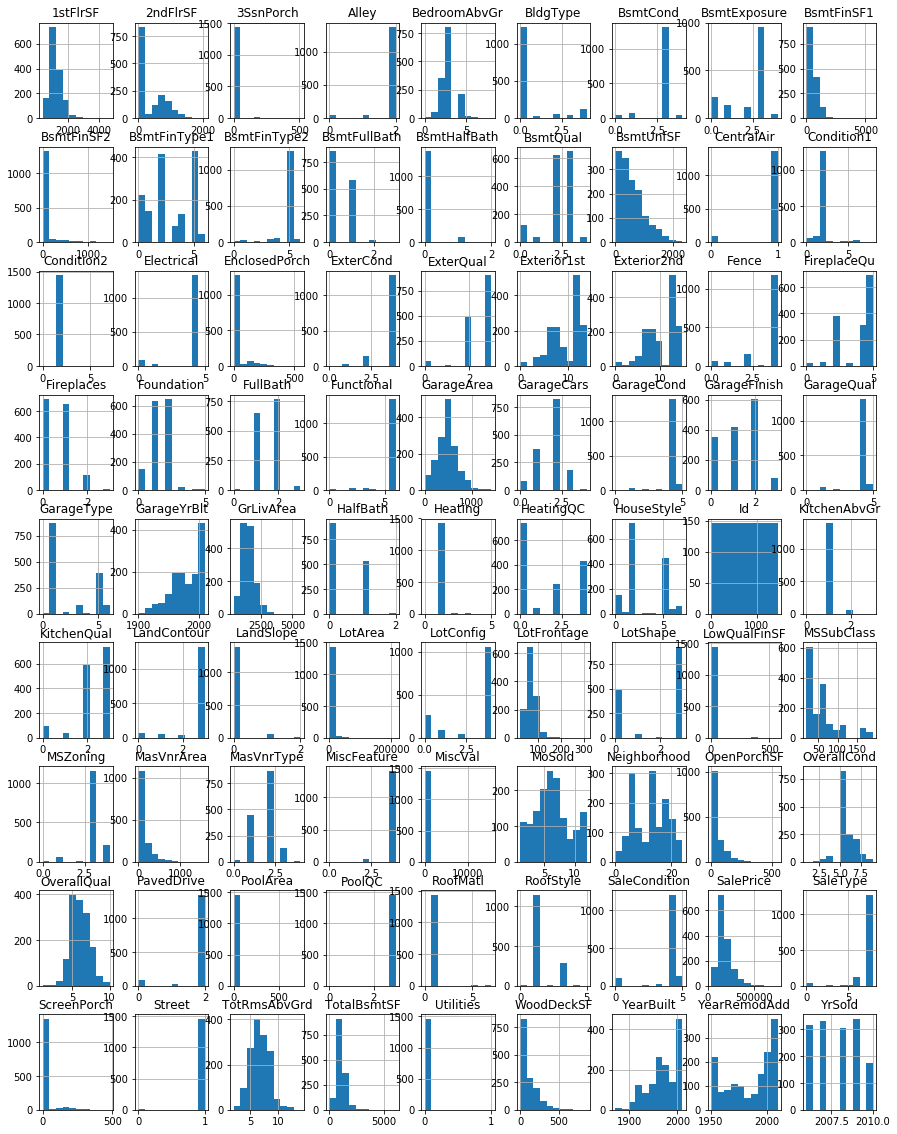

In [361]:
# Check each distributions
train_data.hist(figsize=(15, 20))
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


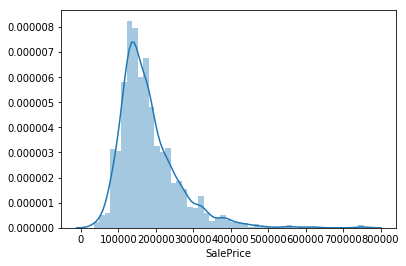

In [363]:
# target value analysis
print(train_data['SalePrice'].describe())
sns.distplot(train_data['SalePrice'])

SalePrice                                                    \
                count           mean            std       min       25%   
OverallQual                                                               
1                 2.0   50150.000000   15344.217152   39300.0   44725.0   
2                 3.0   51770.333333   14254.200796   35311.0   47655.5   
3                20.0   87473.750000   24688.567399   37900.0   75500.0   
4               116.0  108420.655172   29022.003886   34900.0   88000.0   
5               397.0  133523.347607   27107.330927   55993.0  118000.0   
6               374.0  161603.034759   36090.182933   76000.0  139125.0   
7               319.0  207716.423197   44466.259414   82500.0  179470.0   
8               168.0  274735.535714   63898.902253  122000.0  234557.5   
9                43.0  367513.023256   81278.174849  239000.0  318980.5   
10               18.0  438588.388889  159785.491058  160000.0  349375.0   

                                           
                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2             60000.0   60000.0   60000.0  
3             86250.0   97500.0  139600.0  
4            108000.0  125500.0  256000.0  
5            133000.0  147000.0  228950.0  
6            160000.0  181000.0  277000.0  
7            200141.0  230750.0  383970.0  
8            269750.0  306250.0  538000.0  
9            345000.0  389716.0  611657.0  
10           432390.0  472875.0  755000.0

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


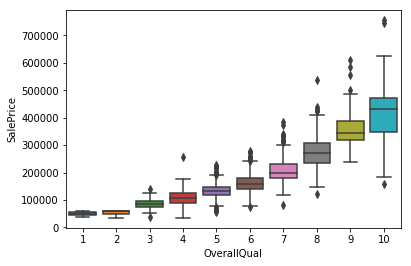

In [364]:
# Check the relationship between overallqual and saleprice
sns.boxplot(train_data['OverallQual'], train_data['SalePrice'])
train_data[['OverallQual', 'SalePrice']].groupby('OverallQual').describe()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


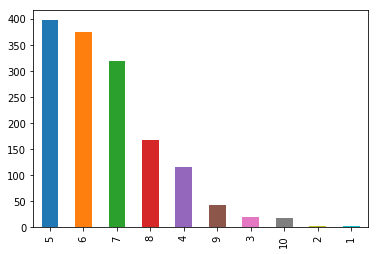

In [365]:
# Check overallqual
print(train_data['OverallQual'].value_counts())
train_data['OverallQual'].value_counts().plot(kind='bar')

In [367]:
# complementing missing values
print(train_data.isnull().sum())
print("______________________________________")
print(test_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
                ... 
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF  

In [404]:
# complementing misssing values with mode
for col1, col2 in zip(train_data.columns, test_data.columns):
        train_data[col1].fillna(train_data[col1].mode, inplace=True)
        test_data[col2].fillna(test_data[col2].mode, inplace=True)

In [486]:
# standardization
train_id = train_data['Id']
test_id = test_data['Id']

y_train = train_data['SalePrice']
X_train = train_data.drop(['Id', 'SalePrice'], axis=1)
X_test = test_data.drop('Id', axis=1)

X_train.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1, inplace=True)
X_test.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1, inplace=True)

In [487]:
X_test.dtypes.values[:32]

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64')],
      dtype=object)

In [476]:
X_test.iloc[:,:32].dtypes

MSSubClass       int64
MSZoning         int64
LotArea          int64
Street           int64
Alley            int64
LotShape         int64
LandContour      int64
Utilities        int64
LotConfig        int64
LandSlope        int64
Neighborhood     int64
Condition1       int64
Condition2       int64
BldgType         int64
HouseStyle       int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        int64
RoofMatl         int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
ExterQual        int64
ExterCond        int64
Foundation       int64
BsmtQual         int64
BsmtCond         int64
BsmtExposure     int64
BsmtFinType1     int64
BsmtFinSF1      object
dtype: object

In [449]:
X_train.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
      

In [489]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
display(X_train_scaled.head())

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502


In [ ]:
# a = [10, 2, 4, 5, 3, 7, 6, 100]
# print(np.argsort(a)) # 昇順のindexが返ってくる
# print(np.argsort(a)[::-1][:2]) # 降順のindexに変更したのちに上位n要素を抽出する

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


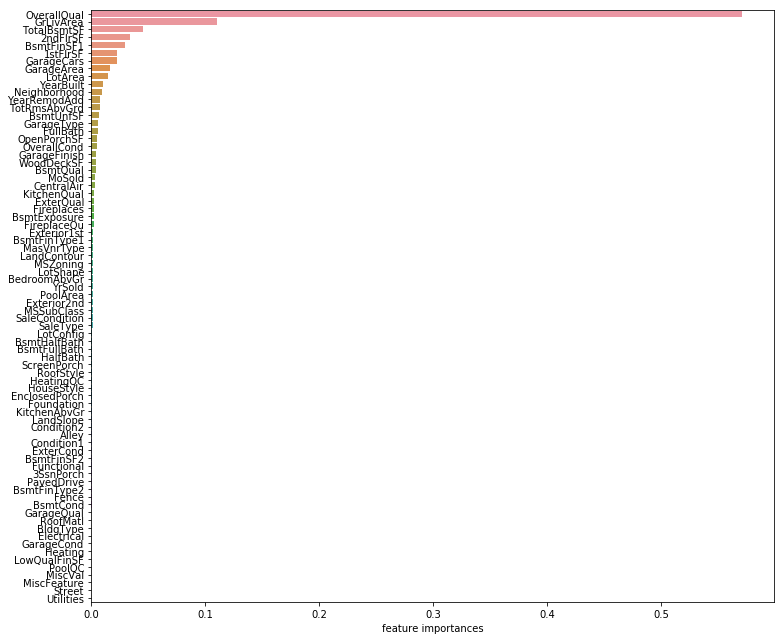

In [490]:
# feature selection
clf_rf = RandomForestRegressor(n_estimators=80, max_features='auto', random_state=1028)
clf_rf.fit(X_train_scaled, y_train)

ranking = np.argsort(-clf_rf.feature_importances_)

f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=clf_rf.feature_importances_[ranking], y=X_train_scaled.columns[ranking], orient='h')
ax.set_xlabel('feature importances')
plt.tight_layout()
plt.show()

In [492]:
X_train_selected = X_train_scaled.iloc[:, ranking[:30]]
X_test_selected = X_test_scaled.iloc[:, ranking[:30]]

In [500]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

xgb_model = xgb.XGBRegressor()
params = {'max_depth':[2, 4, 6], 'n_estimators':[50, 100, 200]}

grid_obj = GridSearchCV(estimator=xgb_model, param_grid=params, verbose=1)
#verbose=1では一定の間隔でログを表示，verbose=2ではテスト毎にログを表示，verbose=3ではテスト毎にスコアも含めてログを表示する
grid_fit = grid_obj.fit(X_train_selected, y_train)
best_clf = grid_obj.best_estimator_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    8.7s finished


In [506]:
best_clf

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [505]:
yhat = best_clf.predict(X_test_selected)
print(yhat)

[133568.64 166031.27 182783.27 ... 182241.8  124627.73 246028.17]


In [518]:
submit_df = pd.DataFrame({'Id':test_id, 'SalePrice':yhat})
display(submit_df.head(10))

,Id,SalePrice
0,1461,133568.640625
1,1462,166031.265625
2,1463,182783.265625
3,1464,190615.687500
4,1465,203327.343750
5,1466,171973.265625
6,1467,171031.156250
7,1468,170407.078125
8,1469,186992.718750
9,1470,130484.273438


In [520]:
# output to csv
submit_df.to_csv("submit.csv", index=False)